<a href="https://colab.research.google.com/github/juel-123/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Project Title : Online Retail Customer Segmentation*

Project type :Unsupervised ML

Contribution: Indiviual

#*Github link:https://github.com/juel-123/Online_Retail_Customer_Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb*

#*Project Summary*

The aim of this ML project is to perform segmentation for an online retail business. Customer segmentation involves dividing a customer base into distinct groups on shared characteristics, behaviours,or preferences.By effectively segmenting customers, businesses can gain valuable insights and tailor their marketing strategies to specific customer Groups, leading to improved customer satisfaction and increased profitability.

Dataset : The project utilizes a dataset containing relevant information about the online retail customers. The dataset contains features such as Customer Demographics, Purchase history, frequency of purchases, monetary value of purchases, and other relevant variables that can help segmenting customers effectively.

Primary objective: The primary objective of this is to apply ML techniques to segment the online retail customers in to meaningful groups based on their purchasing behaviour and characteristics. This segmentation will help the business to better understanding it's customer base, identifying the pattern, trends and develop personalized marketing campaigns to target each segment.

#*Data Description*

Attribute information:



* Invoice : Invoce no ,Nominal , a 6-digit integral number assigned to each transcation. if this code starts with 'c' indicates a cancellation.

* StockCode : Product(item) code.Nominal , a 5-digit integral number uniquely assigned to each distinct product.  
*  Description: Product (item) name.Nominal


*  Quantity : The quantities of each product per transcation. Numeric.


* InvoiceDate : Invoice date and time. Numeric, the day and time when each transcation was generated.  
*  Unit price: Unit price, Product price on unit selling.

#*Importing libararies*

In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing dataset
df = pd.read_csv('/content/drive/MyDrive/Online Retail.xlsx - Online Retail.csv')

In [ ]:
# First five rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# last five rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [ ]:
# shape of the dataset
df.shape

(541909, 8)

#*Data Wrangling*

In [ ]:
# Geting the information from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Observations:


*   Datatype of InvoiceDate is object type need to convert into Datetime
*   If the InvoiceNo starts with C means it's cancellation. We need to drop this entries.
*   There are null values in CustomerID and Description.






In [ ]:
# let's check the null values in the dataset
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

There are Null values in Description and CustomerID and We need to fix it.

In [ ]:
# Dropping all missing values
df.dropna(inplace= True)

In [ ]:
# Now geting the shape
df.shape

(406829, 8)

In [ ]:
# Statistical analysis of the data
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000




*   Here we can see Quantity has negative value




In [ ]:
# let's see the negative values in Quantity
df[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/11 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/11 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/11 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/11 11:58,1.25,17315.0,United Kingdom


In [ ]:
# Changing the datatype to string
df['InvoiceNo'] =df['InvoiceNo'].astype('str')

In [ ]:
# InvoiceNO start's with C means Cancellation , we need to drop this
df= df[~df['InvoiceNo'].str.contains('C')]

In [ ]:
#Checking unit price with values with 0
len(df[df['UnitPrice']==0])

40

In [ ]:
# checking Unitprice value Greater than Zero
df= df[df['UnitPrice']>0]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [ ]:
# checking data analysis after dropping out the unwanted values.
df.describe()

,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [ ]:
# shape of the filter out dataset
df.shape

(397884, 8)

#*Feature Engineering*

In [ ]:
# converting InvoiceDate to Datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format = '%m/%d/%y %H:%M')

In [ ]:
df['year']= df['InvoiceDate'].apply(lambda x: x.year)
df['month_num']= df['InvoiceDate'].apply(lambda x: x.month)
df['day_num']= df['InvoiceDate'].apply(lambda x: x.day)
df['hour']= df['InvoiceDate'].apply(lambda x: x.hour)
df['minute']= df['InvoiceDate'].apply(lambda x: x.minute)

In [ ]:
# Exctracting month name and day name from InvoiceDate
df['Month'] = df['InvoiceDate'].dt.month_name()
df['day'] = df['InvoiceDate'].dt.day_name()

In [ ]:
# Adding a new column
df['Amount']= df['Quantity']*df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,day,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34


#*EDA (Exploratory Data Analysis)*

In [ ]:
# Columns in the dataset
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'day', 'Amount'],
      dtype='object')

###*Visualization on Description*

In [ ]:
top_10_products = df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).head(10)
top_10_products

,Product_name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2028
1,REGENCY CAKESTAND 3 TIER,1723
2,JUMBO BAG RED RETROSPOT,1618
3,ASSORTED COLOUR BIRD ORNAMENT,1408
4,PARTY BUNTING,1396
5,LUNCH BAG RED RETROSPOT,1316
6,SET OF 3 CAKE TINS PANTRY DESIGN,1159
7,LUNCH BAG BLACK SKULL.,1105
8,POSTAGE,1099
9,PACK OF 72 RETROSPOT CAKE CASES,1068


Text(0.5, 1.0, 'Top_10_products')

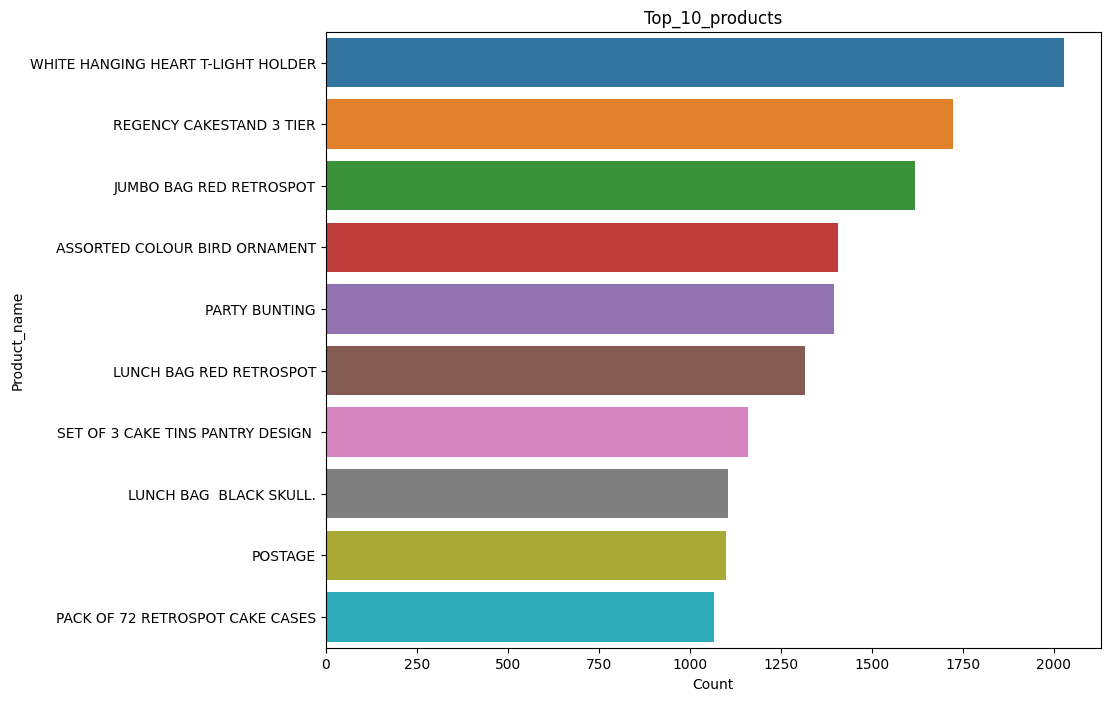

In [ ]:
# plotting bar plot of top ten products
plt.figure(figsize=(10,8))
sns.barplot(x =top_10_products['Count'] ,y=top_10_products['Product_name'])
plt.title('Top_10_products')

From the visualization we can infer that product named WHITE HANGING HEART T-LIGHT HOLDER is most bought product by the customers.

In [ ]:
bottom_10_products = df['Description'].value_counts().reset_index().rename(columns={'index':'Product_name','Description':'Count'}).tail(10)
bottom_10_products

,Product_name,Count
3867,BLUE FELT HANGING HEART WITH FLOWER,1
3868,GLASS CAKE COVER AND PLATE,1
3869,CRACKED GLAZE EARRINGS RED,1
3870,SCALLOP SHELL SOAP DISH,1
3871,NECKLACE+BRACELET SET PINK DAISY,1
3872,RUBY GLASS CLUSTER EARRINGS,1
3873,PINK CHRYSANTHEMUMS ART FLOWER,1
3874,72 CAKE CASES VINTAGE CHRISTMAS,1
3875,"WALL ART , THE MAGIC FOREST",1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


Text(0.5, 1.0, 'Bottom_10_products')

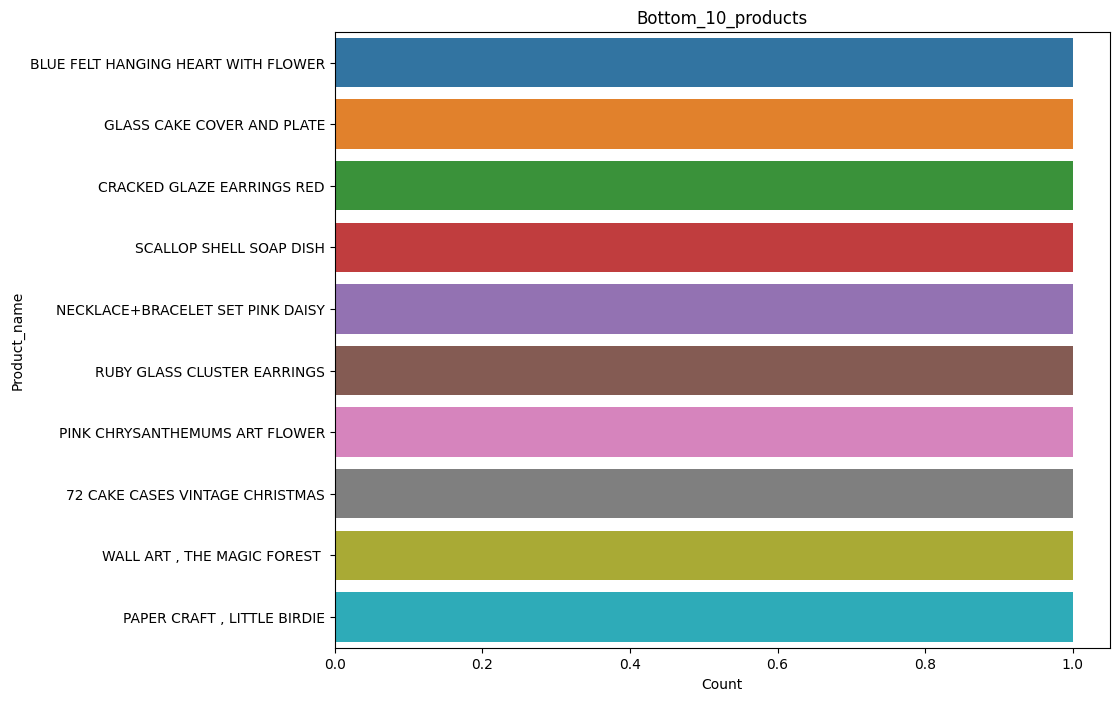

In [ ]:
# plotting bar plot of top ten products
plt.figure(figsize=(10,8))
sns.barplot(x =bottom_10_products['Count'] ,y=bottom_10_products['Product_name'])
plt.title('Bottom_10_products')

###*Visualization on StockCode*

In [ ]:
top_10_StockCodes = df['StockCode'].value_counts().reset_index().rename(columns={'index':'StockCode','StockCode':'Count'}).head(10)
top_10_StockCodes

,StockCode,Count
0,85123A,2035
1,22423,1723
2,85099B,1618
3,84879,1408
4,47566,1396
5,20725,1317
6,22720,1159
7,20727,1105
8,POST,1099
9,23203,1098


Text(0.5, 1.0, 'Top_10_StockCodes')

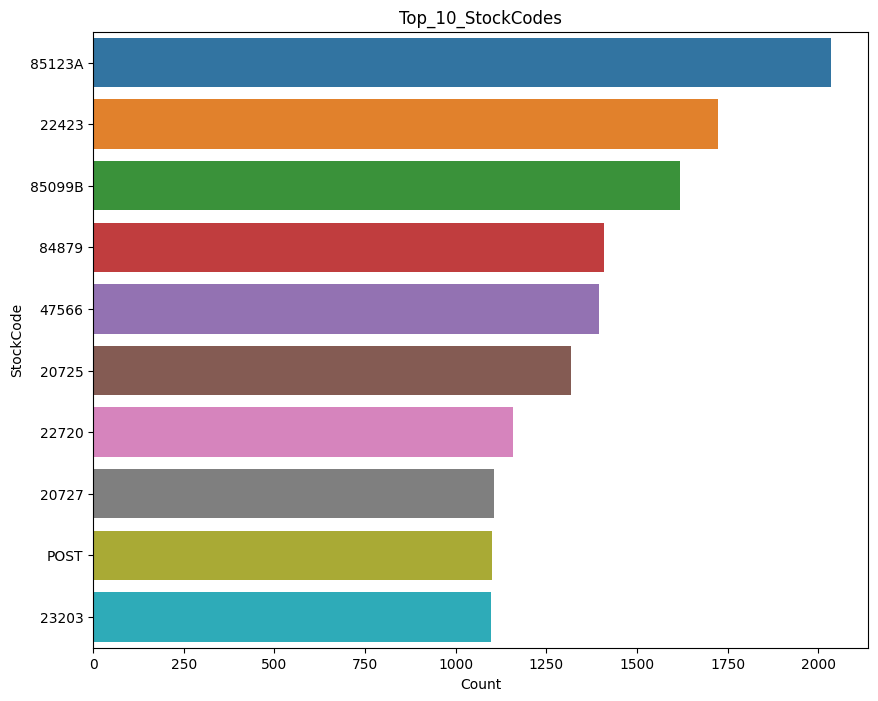

In [ ]:
# plotting bar plot of top ten products
plt.figure(figsize=(10,8))
sns.barplot(x =top_10_StockCodes['Count'] ,y=top_10_StockCodes['StockCode'])
plt.title('Top_10_StockCodes')

From the visualization we can infer that the Stockcode of 85123A	has the highest selling.

###*Visualization on Customers*

In [ ]:
top_10_customers = df['CustomerID'].value_counts().reset_index().rename(columns={'index':'CustomerID','CustomerID':'Products_puchasing_count'}).head(10)
top_10_customers

,CustomerID,Products_puchasing_count
0,17841.0,7847
1,14911.0,5675
2,14096.0,5111
3,12748.0,4595
4,14606.0,2700
5,15311.0,2379
6,14646.0,2076
7,13089.0,1818
8,13263.0,1677
9,14298.0,1637


Text(0.5, 1.0, 'Top_10_customers')

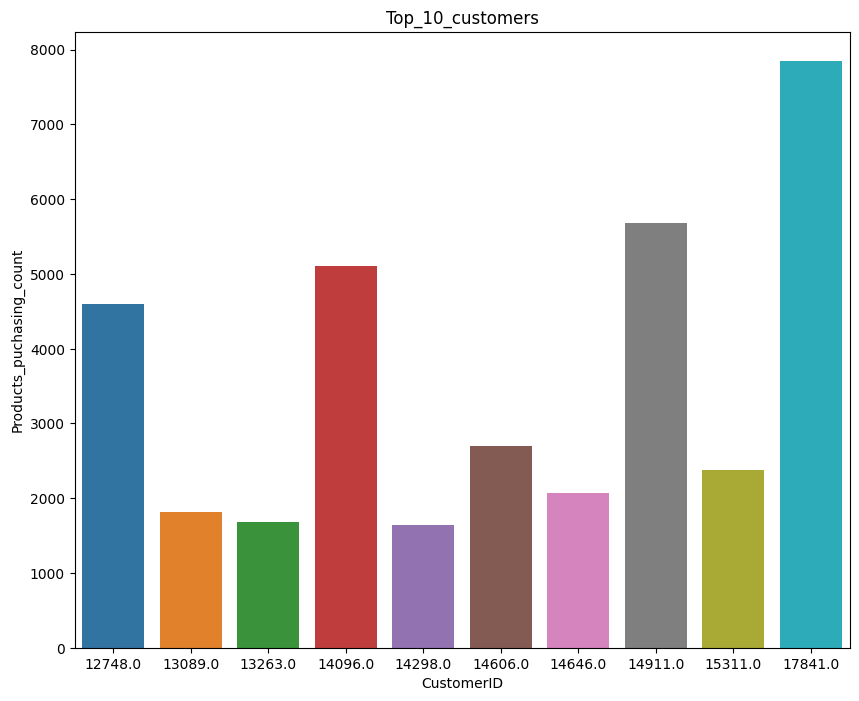

In [ ]:
# Customers purchased highest no of products
plt.figure(figsize=(10,8))
sns.barplot(y =top_10_customers['Products_puchasing_count'] ,x=top_10_customers['CustomerID'])
plt.title('Top_10_customers')

CustomerID- 17841 has Purchased the highest number of Products

###*Visualization on Country*

In [ ]:
top_10_countries = df['Country'].value_counts().reset_index().rename(columns={'index':'Country','Country':'Customer_count'}).head(10)
top_10_countries

,Country,Customer_count
0,United Kingdom,354321
1,Germany,9040
2,France,8341
3,EIRE,7236
4,Spain,2484
5,Netherlands,2359
6,Belgium,2031
7,Switzerland,1841
8,Portugal,1462
9,Australia,1182


Text(0.5, 1.0, 'top_10_countries')

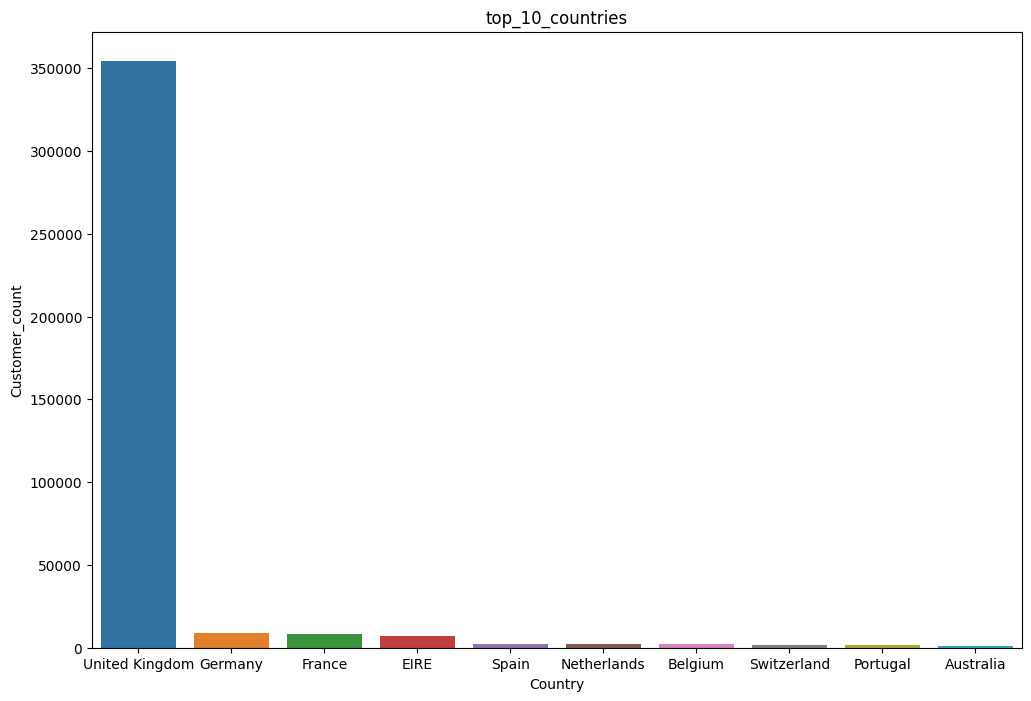

In [ ]:
# Visualizing the countries where Maximum selling is done
plt.figure(figsize=(12,8))
sns.barplot(y =top_10_countries['Customer_count'] ,x=top_10_countries['Country'])
plt.title('top_10_countries')



*   Customers from United Kingdom has highest number of customers.
*   Customers from Spain , Netherlands, Belgium has very close number of customers.



###*Visualization on Month*

In [ ]:
sales_in_month = df['Month'].value_counts().reset_index().rename(columns={'index':'Month','Month':'sales_count'}).head(10)
sales_in_month

,Month,sales_count
0,November,64531
1,October,49554
2,December,43461
3,September,40028
4,May,28320
5,June,27185
6,March,27175
7,August,27007
8,July,26825
9,April,22642


Text(0.5, 1.0, 'sales_in_month')

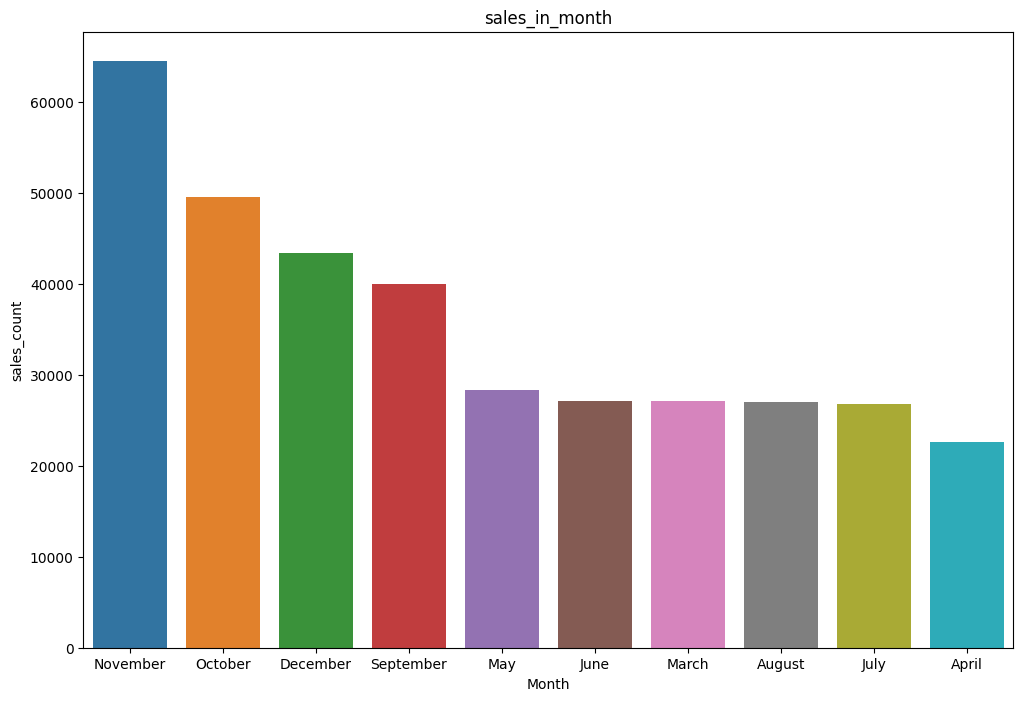

In [ ]:
# Visualization on sales in a month
plt.figure(figsize=(12,8))
sns.barplot(y =sales_in_month['sales_count'] ,x=sales_in_month['Month'])
plt.title('sales_in_month')

The sales has been more in the month of November

In [ ]:
# sales on different days
sales_on_day_basis= df['day'].value_counts().reset_index().rename(columns={'index':'day','day':'sales_count'})
sales_on_day_basis

,day,sales_count
0,Thursday,80035
1,Wednesday,68885
2,Tuesday,66473
3,Monday,64893
4,Sunday,62773
5,Friday,54825


Text(0.5, 1.0, 'sales_on_day_basis')

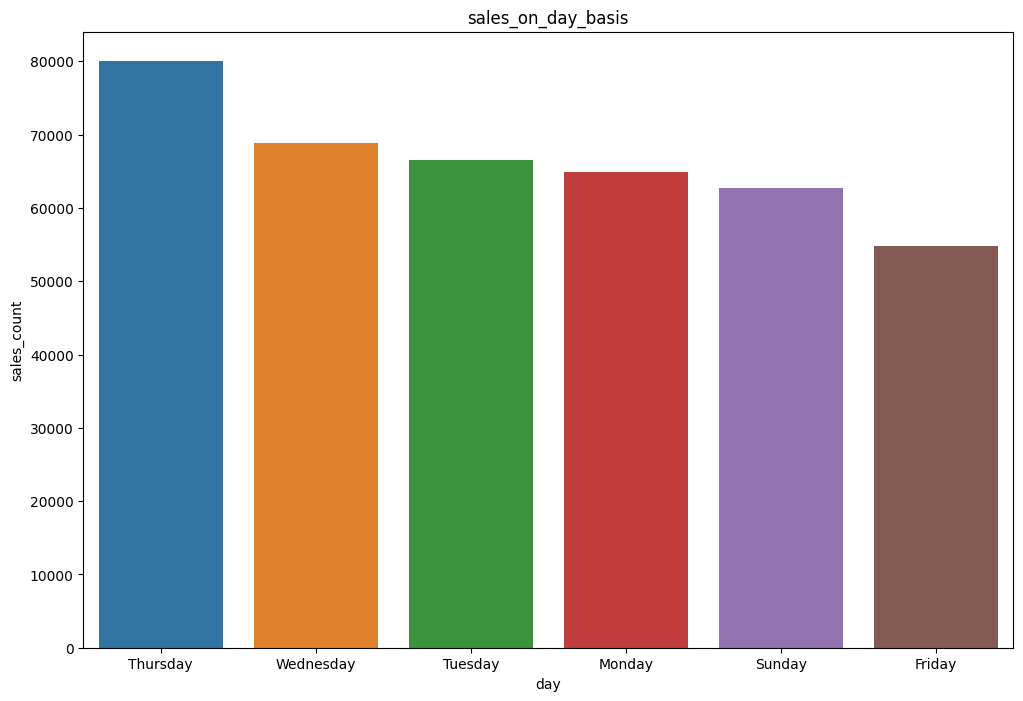

In [ ]:
# visualizing sales on different days
plt.figure(figsize=(12,8))
sns.barplot(y =sales_on_day_basis['sales_count'] ,x=sales_on_day_basis['day'])
plt.title('sales_on_day_basis')


Among all days , the selling was done more in Thrushday

#*Model Building*

##*What is RFM?*

RFM(Recency, Frequency, Monetary) analysis is widely used Customer segmentation technique in marketing and analytics.It helps businesses understand and categorize their customers based on three key factors.


*   Recency: How recently they made purchase.
*   Frequency: How frequently they make Purchase.
*   Monetary : How much they spend.

RMF analysis enables businesses to identify and target different customer segment with customized marketing approach.






###*Why it is Needed?*

RFM analysis is marketing framework that is used to understand and analyze customer behaivour based on the above three factors Recency, Frequency and Monetary.

The RFM analysis will help the business to segement their customer base into different homogeneous groups so they can engage with each group with different market strategies.

In [ ]:
# Creating copy of a dataset
rfm_df_ = df.copy()

In [ ]:
rfm_df_

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month_num,day_num,hour,minute,Month,day,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,December,Wednesday,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,9,12,50,December,Friday,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,9,12,50,December,Friday,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,December,Friday,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,9,12,50,December,Friday,16.60


In [ ]:
# Columns of the datset
rfm_df_.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'year', 'month_num', 'day_num',
       'hour', 'minute', 'Month', 'day', 'Amount'],
      dtype='object')

In [ ]:
#Recency = Latest Date - Last Inovice Data, Frequency = count of invoice no. of transaction(s), Monetary = Sum of Total
#Amount for each customer
import datetime as dt

#Set Latest date 2011-12-10 as last invoice date was 2011-12-09. This is to calculate the number of days from recent purchase
Latest_Date = dt.datetime(2011,12,10)

#Create RFM Modelling scores for each customer
rfm_df_ = df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'Amount': lambda x: x.sum()})

#Convert Invoice Date into type int
rfm_df_['InvoiceDate'] = rfm_df_['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
rfm_df_.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'Amount': 'Monetary'}, inplace=True)

rfm_df_.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [ ]:
#Descriptive Statistics (Recency)
rfm_df_.Recency.describe()

count    4338.000000
mean       92.059474
std       100.012264
min         0.000000
25%        17.000000
50%        50.000000
75%       141.750000
max       373.000000
Name: Recency, dtype: float64

<ipython-input-44-2b15a1f98b0e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


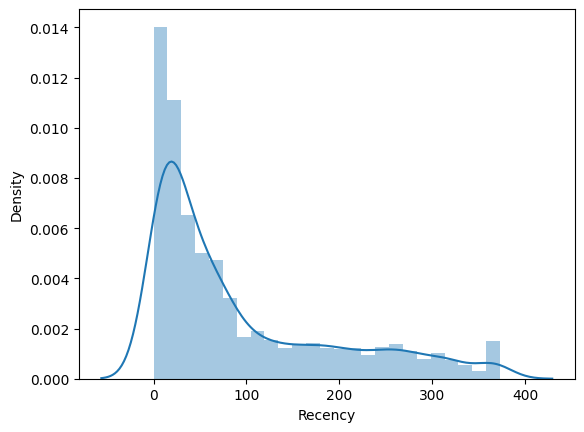

In [ ]:
#Recency distribution plot
x = rfm_df_['Recency']

ax = sns.distplot(x)

Distribution of Recency is highly right skewed

In [ ]:
#Descriptive Statistics (Frequency)
rfm_df_.Frequency.describe()

count    4338.000000
mean       91.720609
std       228.785094
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: Frequency, dtype: float64

<ipython-input-46-01d5491c7b81>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x)


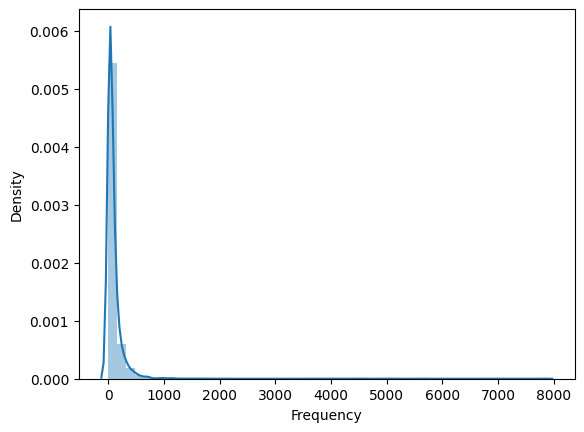

In [ ]:
#Frequency distribution plot
x = rfm_df_['Frequency']

ax = sns.distplot(x)

Distribution of Frequency is highly right skewed

In [ ]:
#Descriptive Statistics (Monetary)
rfm_df_.Monetary.describe()

count      4338.000000
mean       2054.266460
std        8989.230441
min           3.750000
25%         307.415000
50%         674.485000
75%        1661.740000
max      280206.020000
Name: Monetary, dtype: float64

<ipython-input-48-82310e39162f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = rfm_df_['Monetary'])


Text(0.5, 1.0, 'Distribution of Monetary')

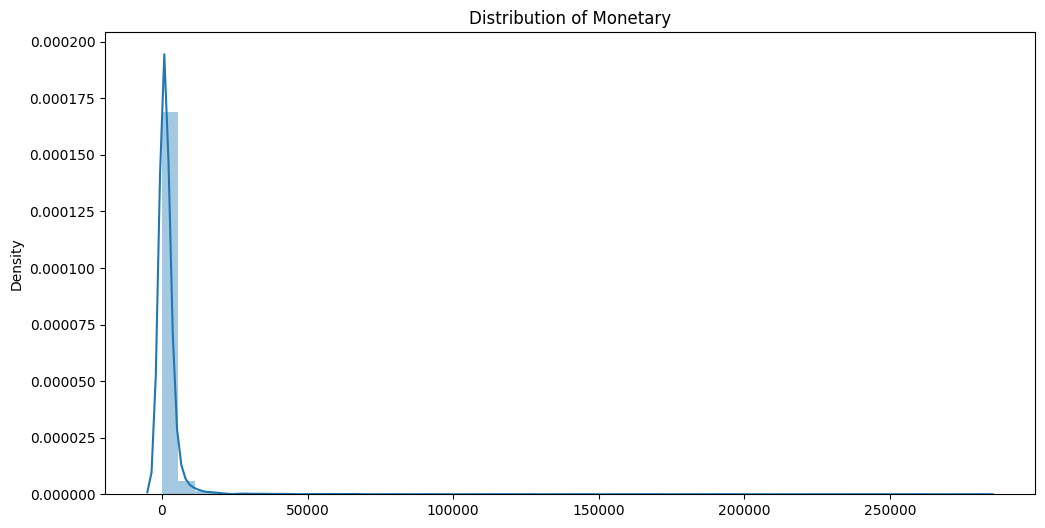

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x = rfm_df_['Monetary'])
plt.title('Distribution of Monetary')


Distribution of Monetary is also highly right skewed

In [ ]:
#Split data into four segments using quantiles
quantile = rfm_df_.quantile(q=[0.25,0.5,0.75])
quantile = quantile.to_dict()

In [ ]:
quantile

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002}}

In [ ]:
#Functions to create R, F and M segments
# lower the recency good for the company
def RScoring(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FnMScoring(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [ ]:
#Calculate Add R, F and M segment value columns in the existing dataset to show R, F and M segment values
rfm_df_['R'] = rfm_df_['Recency'].apply(RScoring, args=('Recency',quantile,))
rfm_df_['F'] = rfm_df_['Frequency'].apply(FnMScoring, args=('Frequency',quantile,))
rfm_df_['M'] = rfm_df_['Monetary'].apply(FnMScoring, args=('Monetary',quantile,))
rfm_df_.head()

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12347.0,2,182,4310.00,1,1,1
12348.0,75,31,1797.24,3,3,1
12349.0,18,73,1757.55,2,2,1
12350.0,310,17,334.40,4,4,3


In [ ]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
rfm_df_['RFMGroup'] =rfm_df_.R.map(str) +rfm_df_.F.map(str) + rfm_df_.M.map(str)

In [ ]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
rfm_df_['RFMScore'] = rfm_df_[['R', 'F', 'M']].sum(axis = 1)
rfm_df_.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [ ]:
# Information of the dataset
rfm_df_.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4338 entries, 12346.0 to 18287.0
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4338 non-null   int64  
 1   Frequency  4338 non-null   int64  
 2   Monetary   4338 non-null   float64
 3   R          4338 non-null   int64  
 4   F          4338 non-null   int64  
 5   M          4338 non-null   int64  
 6   RFMGroup   4338 non-null   object 
 7   RFMScore   4338 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 305.0+ KB


In [ ]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(rfm_df_.RFMScore, q = 4, labels = Loyalty_Level)
rfm_df_['RFM_Loyalty_Level'] = Score_cuts.values
rfm_df_.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12347.0,2,182,4310.00,1,1,1,111,3,Platinum
2,12348.0,75,31,1797.24,3,3,1,331,7,Gold
3,12349.0,18,73,1757.55,2,2,1,221,5,Platinum
4,12350.0,310,17,334.40,4,4,3,443,11,Bronze


In [ ]:
rfm_df_['RFMScore'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

In [ ]:
#Validate the data for RFMGroup = 111
rfm_df_[rfm_df_['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinum
4,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
5,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
6,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
7,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum
8,13694.0,3,568,65039.62,1,1,1,111,3,Platinum
9,15311.0,0,2379,60767.90,1,1,1,111,3,Platinum


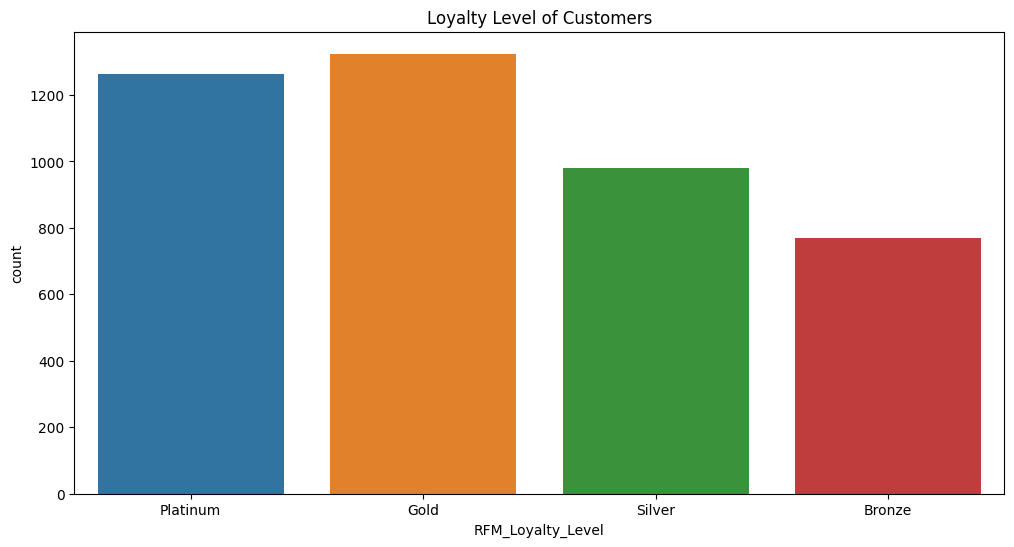

In [ ]:
# ploting loyalty level
plt.figure(figsize=(12,6))
sns.countplot(x=rfm_df_['RFM_Loyalty_Level'])
plt.title('Loyalty Level of Customers')
plt.show()

In [ ]:
# The table contains our target peoples
rfm_df_[rfm_df_['RFM_Loyalty_Level']== 'Platinum'].sort_values('Monetary', ascending= False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,14646.0,1,2076,280206.02,1,1,1,111,3,Platinum
1,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
2,17450.0,8,337,194550.79,1,1,1,111,3,Platinum
3,14911.0,1,5675,143825.06,1,1,1,111,3,Platinum
4,12415.0,24,714,124914.53,2,1,1,211,4,Platinum
5,14156.0,9,1400,117379.63,1,1,1,111,3,Platinum
6,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
7,16029.0,38,242,81024.84,2,1,1,211,4,Platinum
8,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
9,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


In [ ]:
segmentation_based_on_RFM = rfm_df_[['Recency','Frequency','Monetary','RFM_Loyalty_Level']]

In [ ]:
segmentation_based_on_RFM.groupby('RFM_Loyalty_Level').agg({'Recency':['mean','min','max'],'Frequency':['mean','min','max'],'Monetary':['mean','min','max','count']})

Recency            Frequency               Monetary  \
                         mean min  max        mean min   max         mean   
RFM_Loyalty_Level                                                           
Platinum            19.412510   0  140  228.559778  20  7847  5255.277617   
Gold                63.376133   0  372   57.959970   1   543  1169.031202   
Silver             126.029562   1  373   24.503568   1    99   583.936944   
Bronze             217.261039  51  373   10.955844   1    41   199.159506   

                                            
                      min        max count  
RFM_Loyalty_Level                           
Platinum           360.93  280206.02  1263  
Gold               114.34  168472.50  1324  
Silver               6.90   77183.60   981  
Bronze               3.75     660.00   770

In [ ]:
# Handling negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
  if num<=0:
    return 1
  else:
    return num
#Apply handle_neg_n_zero function to Recency and Monetary columns
rfm_df_['Recency'] = [handle_neg_n_zero(x) for x in rfm_df_.Recency]
rfm_df_['Monetary'] = [handle_neg_n_zero(x) for x in rfm_df_.Monetary]

In [ ]:
# perform log transformation to bring the data into normal
log_rfm_df = rfm_df_[['Recency','Frequency','Monetary']].apply(np.log, axis= 1).round(3)

Let's visualize the transformed distribution of Recency, Frequency, Monetary

<ipython-input-65-297498308190>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= log_rfm_df['Recency'])


Text(0.5, 1.0, 'Distribution of Recency')

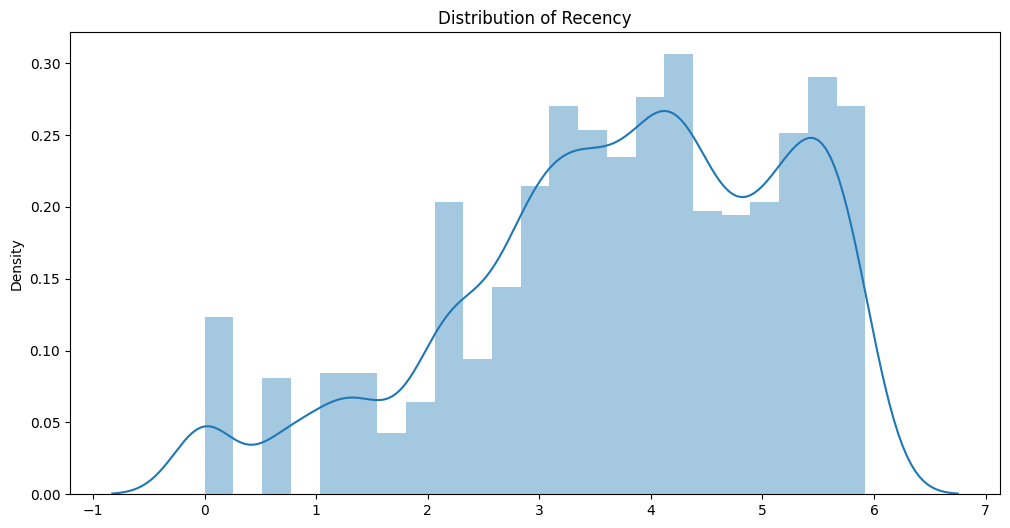

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x= log_rfm_df['Recency'])
plt.title('Distribution of Recency')

<ipython-input-66-b0d8251de0e0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= log_rfm_df['Frequency'])


Text(0.5, 1.0, 'Distribution of Frequency')

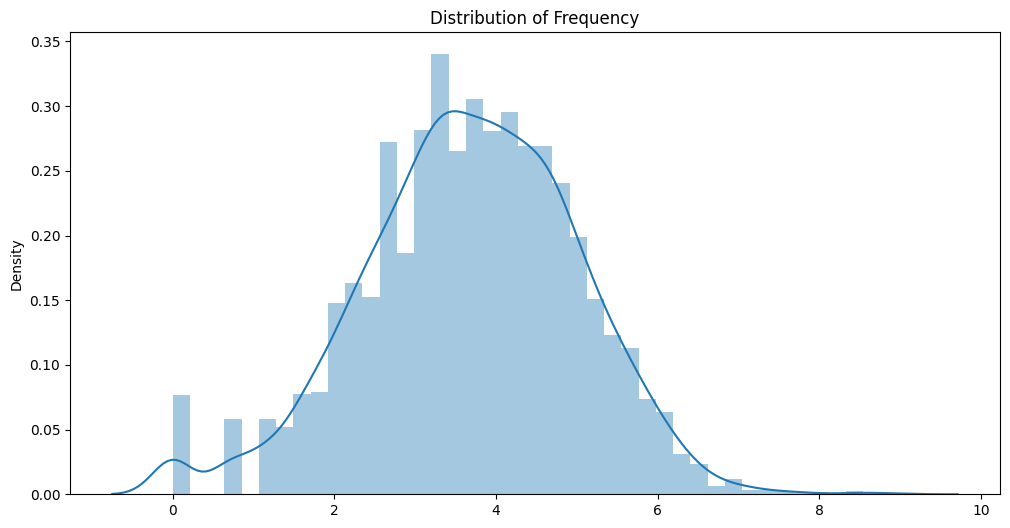

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x= log_rfm_df['Frequency'])
plt.title('Distribution of Frequency')

<ipython-input-67-e9768f4ab1ef>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x= log_rfm_df['Monetary'])


Text(0.5, 1.0, 'Distribution of Monetary')

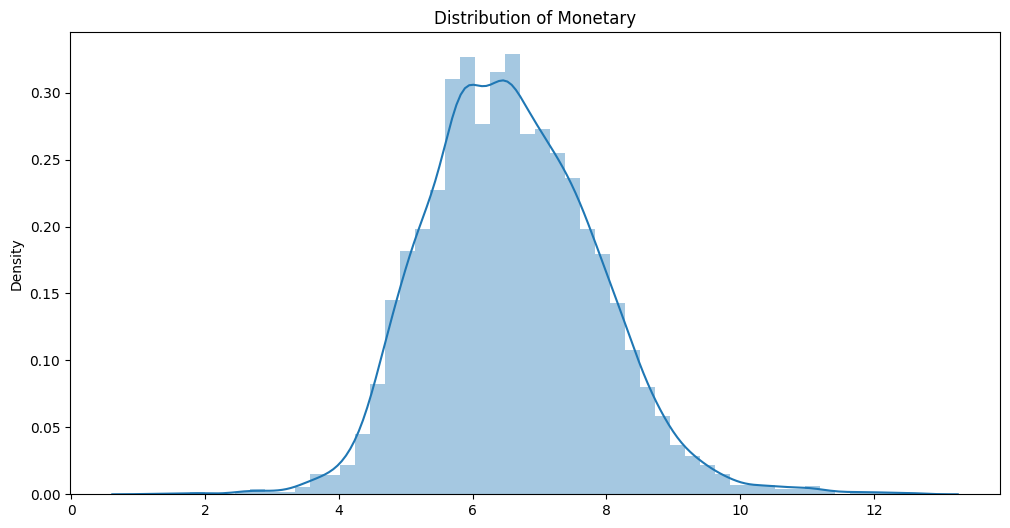

In [ ]:
plt.figure(figsize=(12,6))
sns.distplot(x= log_rfm_df['Monetary'])
plt.title('Distribution of Monetary')

In [ ]:
import math
rfm_df_['Recency_log'] = rfm_df_['Recency'].apply(math.log)
rfm_df_['Frequency_log'] = rfm_df_['Frequency'].apply(math.log)
rfm_df_['Monetary_log'] = rfm_df_['Monetary'].apply(math.log)

In [ ]:
rfm_df_

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log
CustomerID,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676
12350.0,310,17,334.40,4,4,3,443,11,Bronze,5.736572,2.833213,5.812338
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Bronze,5.624018,2.302585,5.196285
18281.0,180,7,80.82,4,4,4,444,12,Bronze,5.192957,1.945910,4.392224
18282.0,7,12,178.05,1,4,4,144,9,Silver,1.945910,2.484907,5.182064


In [ ]:
# importing libraries

from sklearn.metrics import silhouette_score , silhouette_samples
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#*Recency and Monetary*

#***KMeans Clustering***

Before implementing the KMeans Clustering algorithm we need to decide the number of clusters to put inside algorithm as input . so we will be finding the minimum number of clusters required by using elbow method.

**Applying elbow method on Recency and Monetary**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

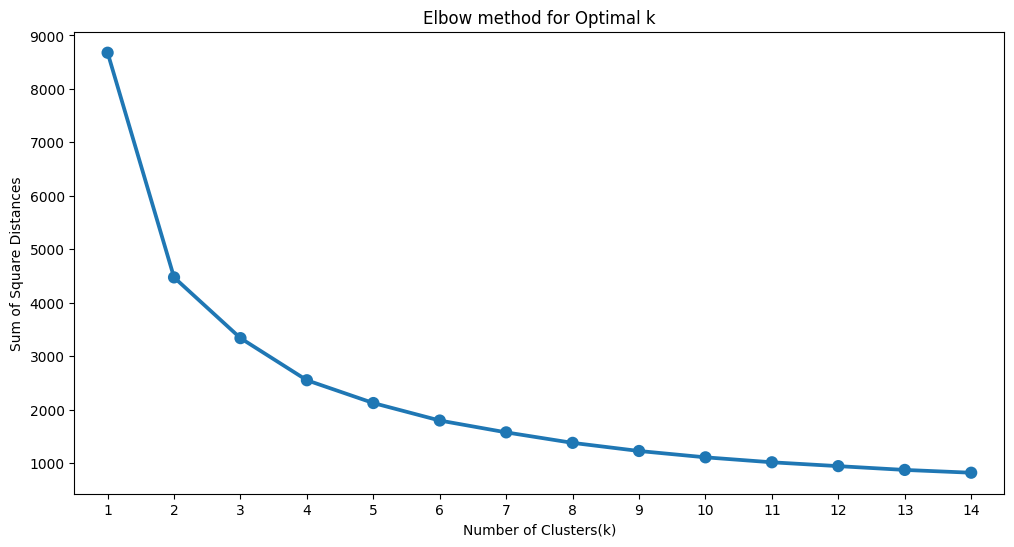

In [ ]:
# taking Recency and Monetary_log in list
Recency_and_Monetary_feat = ['Recency_log', 'Monetary_log']

#taking only Values of recency and monetary in X
X= rfm_df_[Recency_and_Monetary_feat].values

# stardardzing the data
Scaler = StandardScaler()
X= Scaler.fit_transform(X)

# applying Elbow Method
wcss ={}
for k in range (1,15):
  kmeans = KMeans(n_clusters =k, init= 'k-means++', max_iter= 1000)
  kmeans.fit(X)
  wcss[k] = kmeans.inertia_

# plotting the graph the sum of square distance values and no of clusters
plt.figure(figsize=(12,6))
sns.pointplot( x= list(wcss.keys()), y= list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow method for Optimal k')
plt.show()

Here we can see from pointplot that optimal value for cluster is 2

###*Silhoutte Score (Validating above cluster value: 2)*

In [ ]:
# taking Recency and Monetary_log in list
Recency_and_Monetary_feat = ['Recency_log', 'Monetary_log']

#taking only Values of recency and monetary in X
X= rfm_df_[Recency_and_Monetary_feat].values

# stardardzing the data
Scaler = StandardScaler()
X= Scaler.fit_transform(X)

# Silhoutte Score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters = n_clusters, random_state=1)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

  score = silhouette_score(X,preds)
  print('For n_clusters={},silhouette_score is {}'.format(n_clusters, score))




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2,silhouette_score is 0.421461308316105


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3,silhouette_score is 0.3433470120059089


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4,silhouette_score is 0.3649058771514865


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5,silhouette_score is 0.3395250404488943


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6,silhouette_score is 0.3422201212043055


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7,silhouette_score is 0.34787086356830993


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8,silhouette_score is 0.33774535264866695


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9,silhouette_score is 0.3459604789419575


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10,silhouette_score is 0.3479066146663346


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=11,silhouette_score is 0.33753966718471434


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=12,silhouette_score is 0.3427273975494072


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=13,silhouette_score is 0.34235758342627326


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=14,silhouette_score is 0.3376357432302628


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=15,silhouette_score is 0.33730368894983076


Here we can see that for n_cluster=2 sillhouette score is good as compared to others.

**Final model with n_cluster=2**

In [ ]:
# applying Kmeans_clustering algorithm
kmeans_rec_mon = KMeans(n_clusters= 2)
kmeans_rec_mon.fit(X)
y_kmeans = kmeans_rec_mon.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# find the clusters for the observation given in the dataset
rfm_df_['Cluster_based_rec_mon']= kmeans_rec_mon.labels_
rfm_df_.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon
CustomerID,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,1
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,1
12350.0,310,17,334.40,4,4,3,443,11,Bronze,5.736572,2.833213,5.812338,0


In [ ]:
# centers of the clusters(coordinates)
centers = kmeans_rec_mon.cluster_centers_
centers

array([[ 0.58210228, -0.56853158],
       [-0.85183281,  0.83197381]])

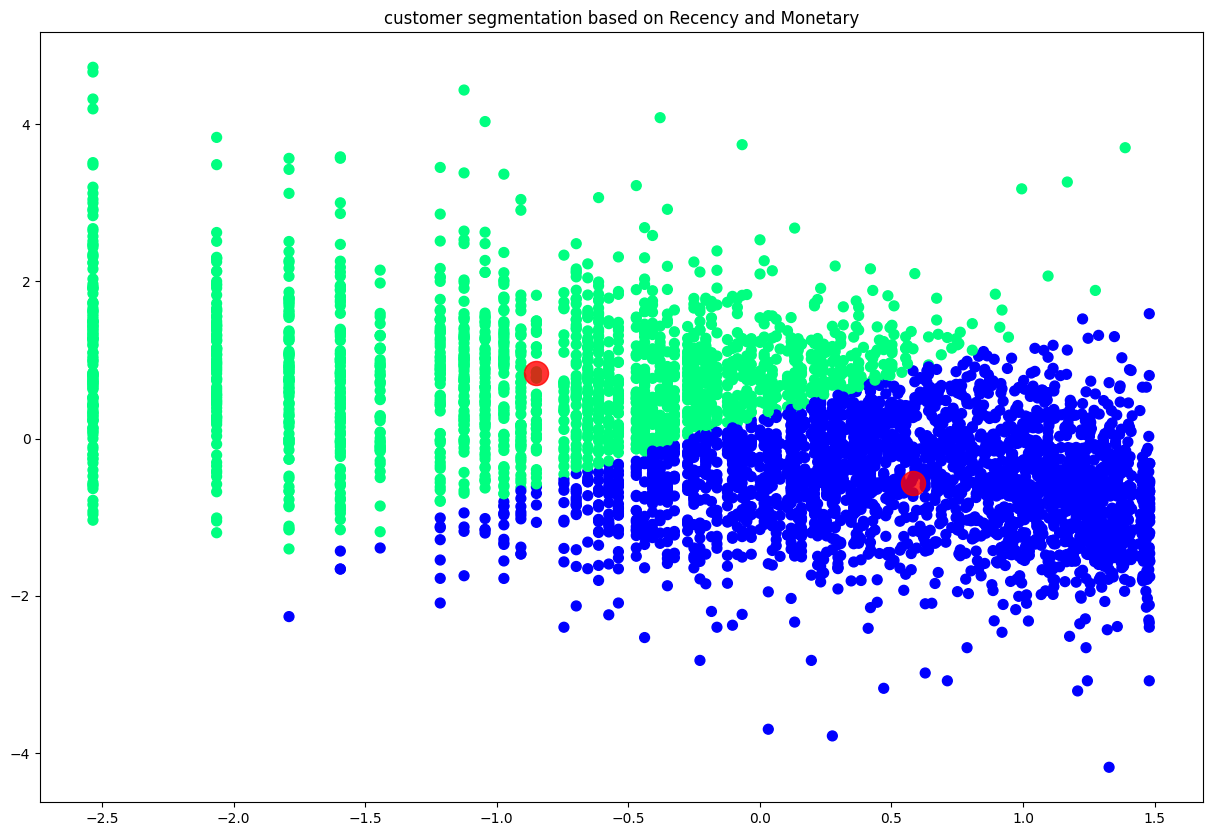

In [ ]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Recency and Monetary')
plt.scatter(X[:,0],X[:,1], c= y_kmeans, s= 50, cmap= 'winter')

centers = kmeans_rec_mon.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c= 'red', s=300, alpha= 0.8)

##*DBSCAN algorithm on Recency and Monetary*

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

In [ ]:
# eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be considered to cluster
db = DBSCAN(eps= 0.3, min_samples= 10 ).fit(X)
core_sample_mask= np.zeros_like(db.labels_,dtype= bool)
core_sample_mask[db.core_sample_indices_]= True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_= list(labels).count(-1)

print('Estimated number of clusters : %d' % n_clusters_)
print('Estimated number of noise points : %d' %n_noise_)
print('silhouette coefficient: %0.3f'%metrics.silhouette_score(X,labels))

Estimated number of clusters : 2
Estimated number of noise points : 76
silhouette coefficient: 0.405


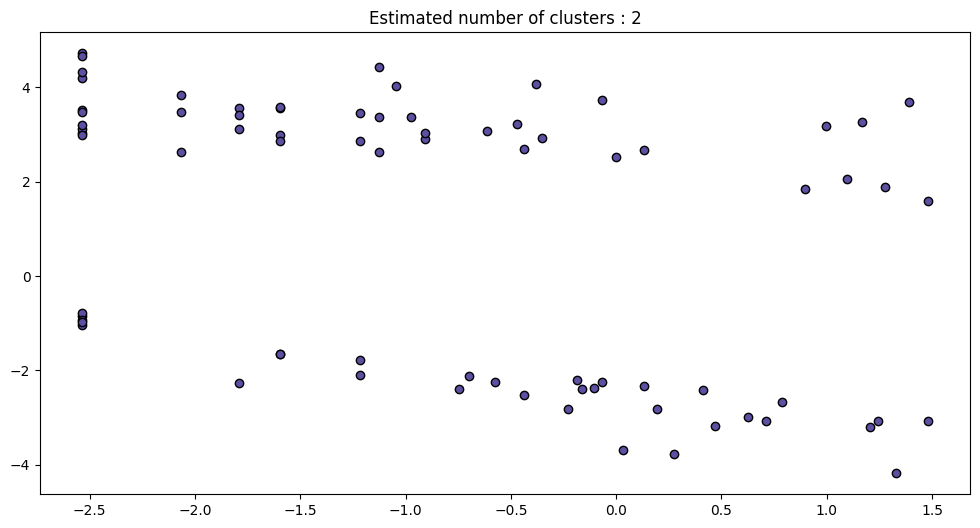

In [ ]:
# black removed and is used for noise instead
unique_labels= set(labels)
colors=[plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
  if k == -1:
    # blacked used for noise

    class_memeber_mask = labels==k

    xy= X[class_memeber_mask & core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor= tuple(col), markeredgecolor="k",markersize= 14,)



    xy= X[class_memeber_mask & ~core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor= tuple(col), markeredgecolor="k",markersize= 6,)

    plt.title('Estimated number of clusters : %d' %n_clusters_)
    plt.show()

#*Frequency and Monetary*

###*KMeans Clustering*

**Applying elbow method on Frequency and Monetary**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

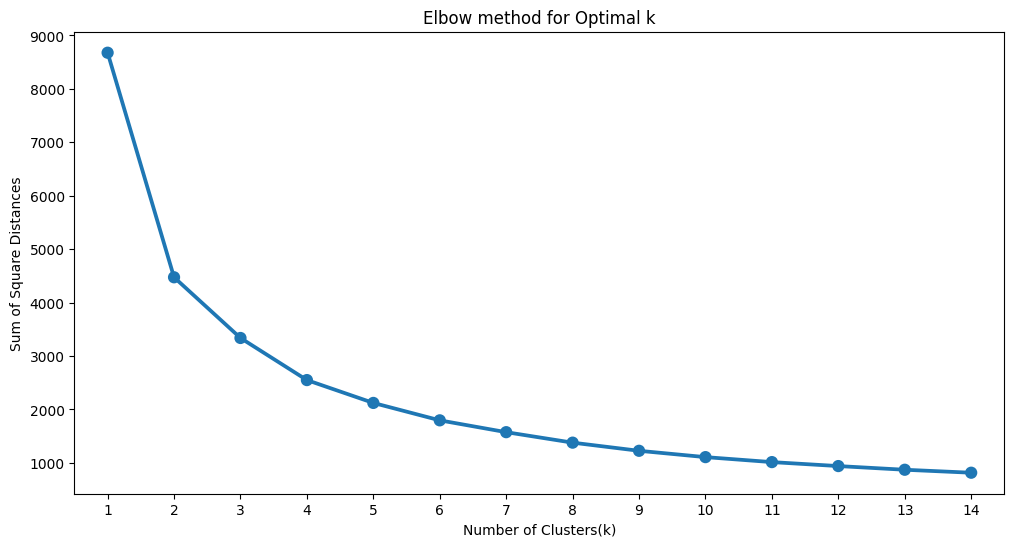

In [ ]:
# taking Frequency and Monetary_log in list
Frequency_and_Monetary_feat = ['Recency_log', 'Monetary_log']

#taking only Values of Frequency and monetary in X
X= rfm_df_[Frequency_and_Monetary_feat].values

# stardardzing the data
Scaler = StandardScaler()
X= Scaler.fit_transform(X)

# applying Elbow Method
wcss ={}
for k in range (1,15):
  kmeans = KMeans(n_clusters =k, init= 'k-means++', max_iter= 1000)
  kmeans.fit(X)
  wcss[k] = kmeans.inertia_

# plotting the graph the sum of square distance values and no of clusters
plt.figure(figsize=(12,6))
sns.pointplot( x= list(wcss.keys()), y= list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow method for Optimal k')
plt.show()

Here we can see from pointplot that optimal value for cluster is 2

###*Silhoutte Score (Validating above cluster value: 2)*

In [ ]:
# taking Frequency and Monetary_log in list
Frequency_and_Monetary_feat = ['Frequency_log', 'Monetary_log']

#taking only Values of recency and monetary in X
X= rfm_df_[Frequency_and_Monetary_feat].values

# stardardzing the data
Scaler = StandardScaler()
X= Scaler.fit_transform(X)

# Silhoutte Score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters = n_clusters, random_state=1)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

  score = silhouette_score(X,preds)
  print('For n_clusters={},silhouette_score is {}'.format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2,silhouette_score is 0.478535709506603


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3,silhouette_score is 0.40764120562174455


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4,silhouette_score is 0.3715810384601166


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5,silhouette_score is 0.3442965607959301


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6,silhouette_score is 0.3586829219947334


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7,silhouette_score is 0.34342098057749704


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8,silhouette_score is 0.3500546906243836


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9,silhouette_score is 0.34419928062567495


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10,silhouette_score is 0.36238664926507114


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=11,silhouette_score is 0.3682455762844025


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=12,silhouette_score is 0.3534862139672636


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=13,silhouette_score is 0.36139542577471895


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=14,silhouette_score is 0.3486849890768239


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=15,silhouette_score is 0.3628225939841498


Here we can see that for n_cluster=2 sillhouette score is good as compared to others.

**Final model with n_cluster=2**

In [ ]:
# applying Kmeans_clustering algorithm
kmeans_fre_mon = KMeans(n_clusters= 2)
kmeans_fre_mon.fit(X)
y_kmeans = kmeans_fre_mon.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# find the clusters for the observation given in the dataset
rfm_df_['Cluster_based_fre_mon']= kmeans_fre_mon.labels_
rfm_df_.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_fre_mon
CustomerID,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,1,0
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,1,0
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1,0
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,1,0
12350.0,310,17,334.40,4,4,3,443,11,Bronze,5.736572,2.833213,5.812338,0,1


In [ ]:
# centers of the clusters(coordinates)
centers = kmeans_fre_mon.cluster_centers_
centers

array([[ 0.79016407,  0.79810393],
       [-0.70535589, -0.71244356]])

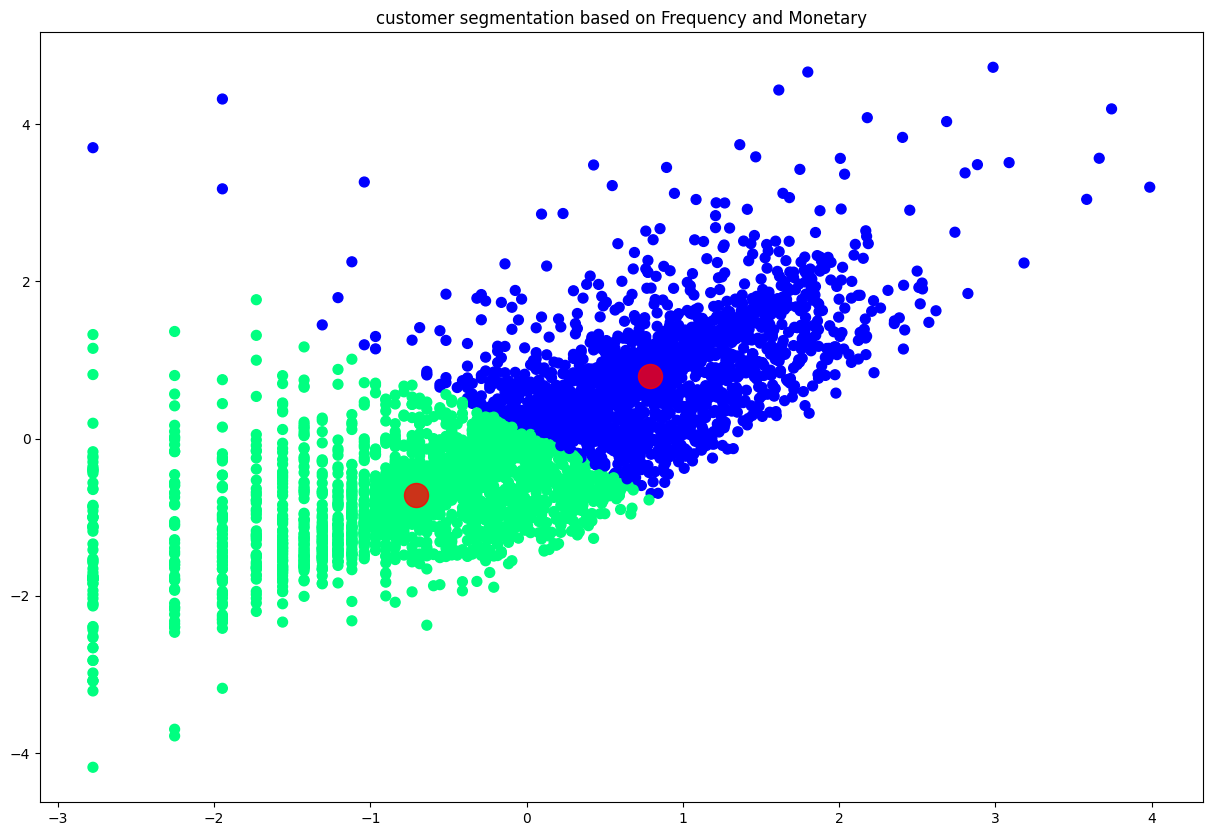

In [ ]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on Frequency and Monetary')
plt.scatter(X[:,0],X[:,1], c= y_kmeans, s= 50, cmap= 'winter')

centers = kmeans_fre_mon.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c= 'red', s=300, alpha= 0.8)

##*DBSCAN algorithm on Frequency and Monetary*

In [ ]:
# eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be considered to cluster
db = DBSCAN(eps= 0.5, min_samples= 15 ).fit(X)
core_sample_mask= np.zeros_like(db.labels_,dtype= bool)
core_sample_mask[db.core_sample_indices_]= True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_= list(labels).count(-1)

print('Estimated number of clusters : %d' % n_clusters_)
print('Estimated number of noise points : %d' %n_noise_)
print('silhouette coefficient: %0.3f'%metrics.silhouette_score(X,labels))

Estimated number of clusters : 2
Estimated number of noise points : 47
silhouette coefficient: 0.426


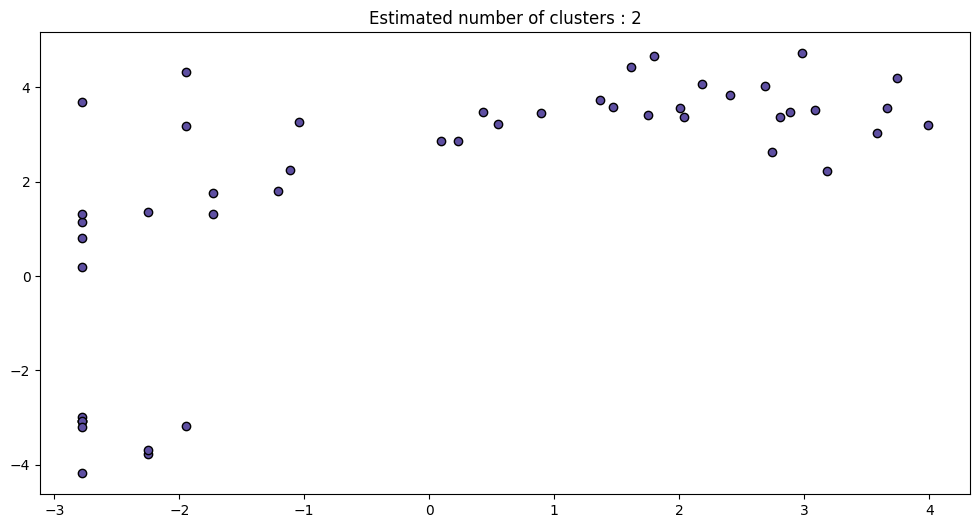

In [ ]:
# black removed and is used for noise instead
unique_labels= set(labels)
colors=[plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
  if k == -1:
    # blacked used for noise

    class_memeber_mask = labels==k

    xy= X[class_memeber_mask & core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor= tuple(col), markeredgecolor="k",markersize= 14,)



    xy= X[class_memeber_mask & ~core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor= tuple(col), markeredgecolor="k",markersize= 6,)

    plt.title('Estimated number of clusters : %d' %n_clusters_)
    plt.show()

#*Recency, Frequency and Monetary*

##*KMeans Clustering*

**Applying elbow method on Recency and Monetary**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

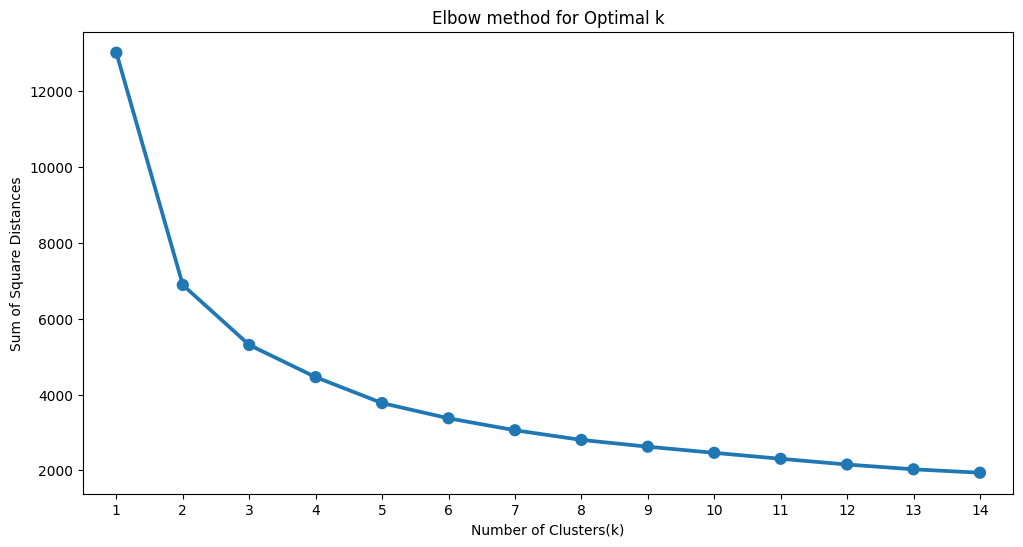

In [ ]:
# taking Recency_log, Frequency_log and Monetary_log in list
Recency_Frequency_and_Monetary_feat = ['Recency_log','Frequency_log', 'Monetary_log']

#taking only Values of Frequency and monetary in X
X= rfm_df_[Recency_Frequency_and_Monetary_feat].values

# stardardzing the data
Scaler = StandardScaler()
X= Scaler.fit_transform(X)

# applying Elbow Method
wcss ={}
for k in range (1,15):
  kmeans = KMeans(n_clusters =k, init= 'k-means++', max_iter= 1000)
  kmeans.fit(X)
  wcss[k] = kmeans.inertia_

# plotting the graph the sum of square distance values and no of clusters
plt.figure(figsize=(12,6))
sns.pointplot( x= list(wcss.keys()), y= list(wcss.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow method for Optimal k')
plt.show()

Here we can see from pointplot that optimal value for cluster is 2

In [ ]:
# taking Recency,Frequency and Monetary_log in list
Recency_Frequency_and_Monetary_feat= ['Recency','Frequency_log', 'Monetary_log']

#taking only Values of recency, frequency and monetary in X
X= rfm_df_[Recency_Frequency_and_Monetary_feat].values

# stardardzing the data
Scaler = StandardScaler()
X= Scaler.fit_transform(X)

# Silhoutte Score

range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters = n_clusters, random_state=1)
  preds = clusterer.fit_predict(X)
  centers = clusterer.cluster_centers_

  score = silhouette_score(X,preds)
  print('For n_clusters={},silhouette_score is {}'.format(n_clusters, score))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2,silhouette_score is 0.4007967220245471


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=3,silhouette_score is 0.37902178097313105


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=4,silhouette_score is 0.33618030076715


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=5,silhouette_score is 0.32550516067322427


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6,silhouette_score is 0.28957985842521805


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=7,silhouette_score is 0.28829356664076655


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8,silhouette_score is 0.2674091724732857


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=9,silhouette_score is 0.27404759717876476


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=10,silhouette_score is 0.2834069244148051


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=11,silhouette_score is 0.26466123828937765


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=12,silhouette_score is 0.26810409379742856


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=13,silhouette_score is 0.2602215956756243


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=14,silhouette_score is 0.26748359703466834


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=15,silhouette_score is 0.26341949576692386


Here we can see that for n_cluster=2 sillhouette score is good as compared to others.

**Final model with n_cluster=2**

In [ ]:
# applying Kmeans_clustering algorithm
kmeans_rec_fre_mon = KMeans(n_clusters= 2)
kmeans_rec_fre_mon.fit(X)
y_kmeans = kmeans_rec_fre_mon.predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# find the clusters for the observation given in the dataset
rfm_df_['Cluster_based_rec_fre_mon']= kmeans_rec_fre_mon.labels_
rfm_df_.head()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_fre_mon,Cluster_based_rec_fre_mon
CustomerID,,,,,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,5.783825,0.000000,11.253942,1,0,0
12347.0,2,182,4310.00,1,1,1,111,3,Platinum,0.693147,5.204007,8.368693,1,0,1
12348.0,75,31,1797.24,3,3,1,331,7,Gold,4.317488,3.433987,7.494007,1,0,1
12349.0,18,73,1757.55,2,2,1,221,5,Platinum,2.890372,4.290459,7.471676,1,0,1
12350.0,310,17,334.40,4,4,3,443,11,Bronze,5.736572,2.833213,5.812338,0,1,0


In [ ]:
# centers of the clusters(coordinates)
centers = kmeans_rec_fre_mon.cluster_centers_
centers

array([[ 0.6619134 , -0.79836385, -0.78533928],
       [-0.54201966,  0.65375454,  0.64308914]])

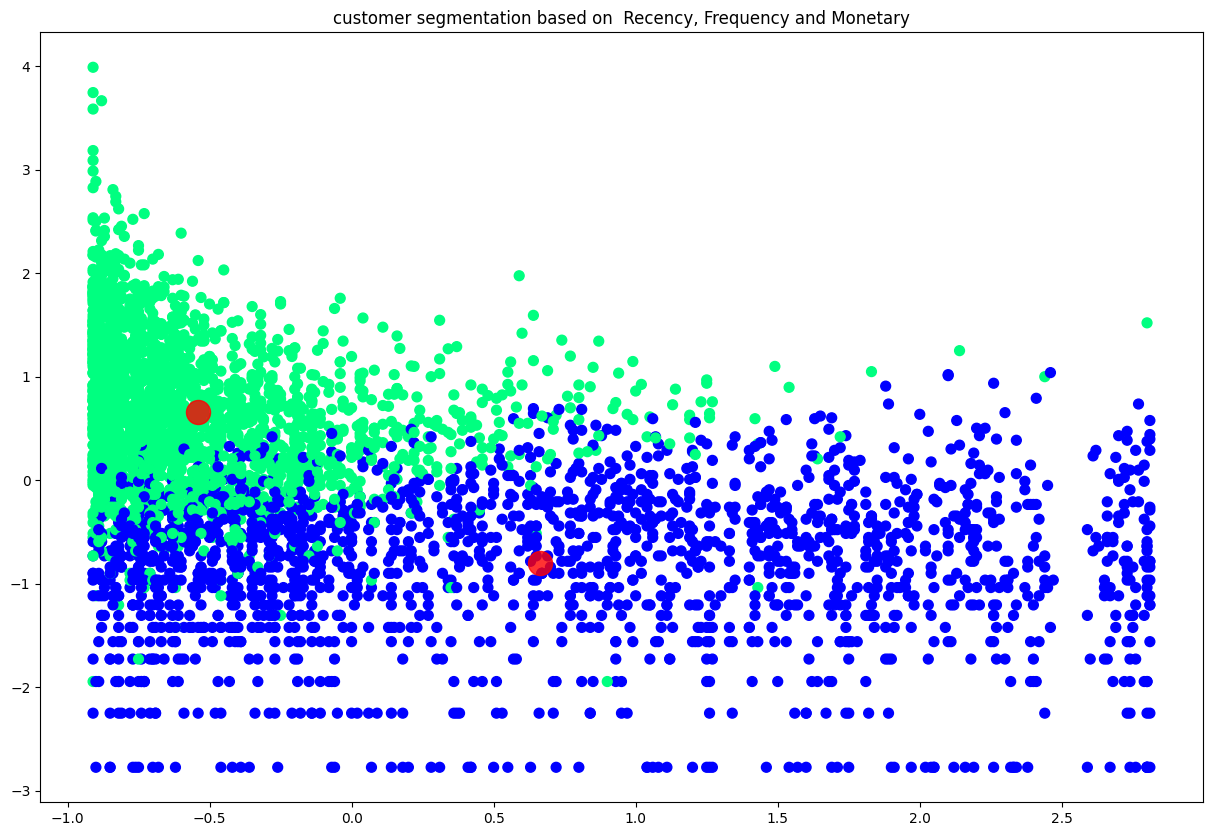

In [ ]:
# ploting visualizing the clusters
plt.figure(figsize=(15,10))
plt.title('customer segmentation based on  Recency, Frequency and Monetary')
plt.scatter(X[:,0],X[:,1], c= y_kmeans, s= 50, cmap= 'winter')

centers = kmeans_rec_fre_mon.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c= 'red', s=300, alpha= 0.8)

##*DBSCAN algorithm on Recency, Frequency and Monetary*

In [ ]:
# eps value is the radius value for the datapoint from which circle is drawn and min sample indicates how many datapoints should be considered to cluster
db = DBSCAN(eps= 0.5, min_samples= 10 ).fit(X)
core_sample_mask= np.zeros_like(db.labels_,dtype= bool)
core_sample_mask[db.core_sample_indices_]= True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
n_noise_= list(labels).count(-1)

print('Estimated number of clusters : %d' % n_clusters_)
print('Estimated number of noise points : %d' %n_noise_)
print('silhouette coefficient: %0.3f'%metrics.silhouette_score(X,labels))

Estimated number of clusters : 2
Estimated number of noise points : 150
silhouette coefficient: 0.352


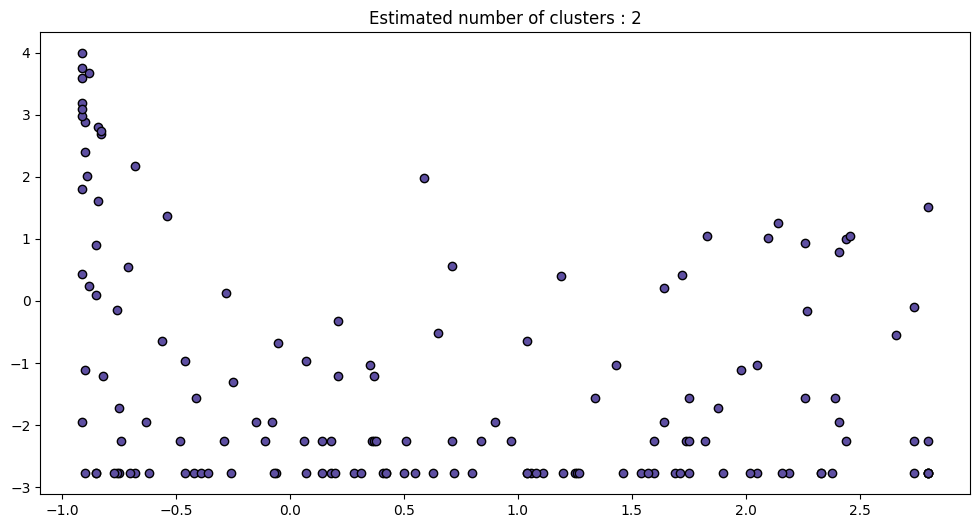

In [ ]:
# black removed and is used for noise instead
unique_labels= set(labels)
colors=[plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]
plt.figure(figsize=(12,6))
for k, col in zip(unique_labels, colors):
  if k == -1:
    # blacked used for noise

    class_memeber_mask = labels==k

    xy= X[class_memeber_mask & core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor= tuple(col), markeredgecolor="k",markersize= 14,)



    xy= X[class_memeber_mask & ~core_sample_mask]
    plt.plot(xy[:,0],xy[:,1],"o",markerfacecolor= tuple(col), markeredgecolor="k",markersize= 6,)

    plt.title('Estimated number of clusters : %d' %n_clusters_)
    plt.show()

#*Hierarchical Clustering*

###*How should we choose the number clusters in hierarchical clustering?*

A dendogram is a tree like diagram that records the sequences of merges or splits. More the distance of the vertical lines in the dendogram , the more the distance between the clusters.

We can set a threshold distance and draw a horizontal line (Generally, we try to set the threshold in a such way that it cuts the tallest vertical line. find largest vertical distance we can make without crossing any other horizontal line ).

In [ ]:
import scipy.cluster.hierarchy as sch

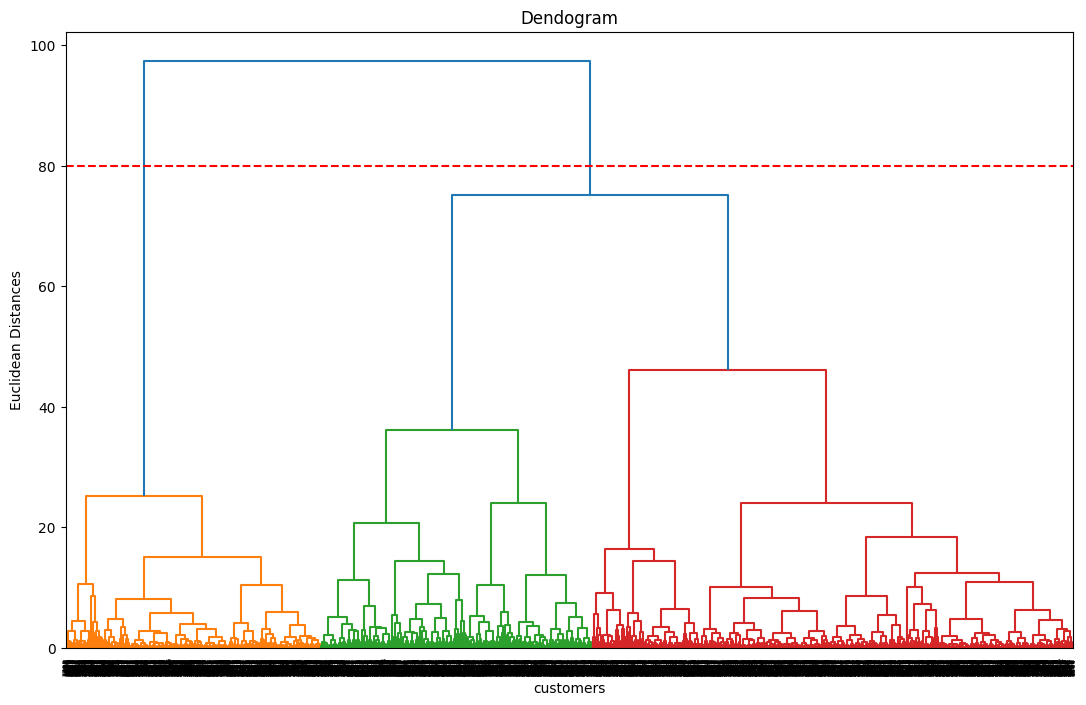

In [ ]:
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendogram')
plt.xlabel('customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=80, color='r',linestyle='--')
plt.show() # find the largest vertical line we can make without crossing any other horizontal line

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.

No.of Clusters: 2

In [ ]:
# fitting hierarchichal clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
h_clustering = AgglomerativeClustering(n_clusters= 2, affinity= 'euclidean', linkage='ward')
y_hc = h_clustering.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [ ]:
rfm_df_.head(1)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Recency_log,Frequency_log,Monetary_log,Cluster_based_rec_mon,Cluster_based_fre_mon,Cluster_based_rec_fre_mon
CustomerID,,,,,,,,,,,,,,,
12346.0,325,1,77183.6,4,4,1,441,9,Silver,5.783825,0.0,11.253942,1,0,0


In [ ]:
data_process_normalized = rfm_df_[['Recency',	'Frequency',	'Monetary' ,'Recency_log',	'Frequency_log',	'Monetary_log','RFM_Loyalty_Level','Cluster_based_rec_fre_mon' ]]

In [ ]:
data_process_normalized.groupby('Cluster_based_rec_fre_mon').agg({'Recency':['mean','min','max'],'Frequency':['mean','min','max'],'Monetary':['mean','min','max','count']})

Recency            Frequency            \
                                 mean min  max        mean min   max   
Cluster_based_rec_fre_mon                                              
0                          158.201126   1  373   20.047595   1   157   
1                           37.862416   1  372  150.466023   3  7847   

                              Monetary                           
                                  mean     min        max count  
Cluster_based_rec_fre_mon                                        
0                           397.117406    3.75   77183.60  1954  
1                          3412.516985  182.77  280206.02  2384

From the above clustering we get that:


*   Cluster 0 has high recency rate but very low frequency and monetary. it contains 1954 customers
*   Cluster 1 has low recency rate but they are frequent buyers and spends ver high money than others as mean monetary is high. Thus generates more revenue to the retail business.



#*Conclusion*

First we did customer segmentation based on RFM analysis.

* Platinum customers = 1263 (less recency rate but high frequency and heavy spending)  
*  Gold customers = 1324 (good recency, frequency and monetary)
*   Silver customers = 981 (high recency ,low frequency and low spending)
*   Bronze customers = 770 (very high recency but very less frequency and spending amount).

Later we implemented Machine learning algorithms to cluster , as we have seen  we got optimal clusters = 2 for all the algorithms.

The RFM analysis emphasizes the importance of personalization in the marketing efforts. By understanding each customer's RFM profile, we can deliver targeted content, product recommendations, and promotions that resonate with their preferences and purchasing history. Personalization enhances customer experience and increases the likelihood of conversion.



The RFM analysis conducted on our online retail business dataset has revealed valuable insights into our customer base and their purchasing behavior. These insights can guide our marketing strategies and customer engagement efforts, ultimately leading to improved customer satisfaction and business growth.





